# 0_전처리

데이터 설명
- 2019.08 ~ 2020.03: 카드 사용에 따른 할인 금액
- 거래 건당 고객정보, 가입정보, 할인금액, 사용날짜, 상업코드 등

In [1]:
import numpy as np
import pandas as pd
from my_func import *  # 커스텀함수 import할 .py 파일

df = pd.read_csv( r"data\[이어드림스쿨] 차이코퍼레이션 데이터.csv" )
display(df.head(2))
infox(df)  # my_func.py 파일에 정의된 함수: infox()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6


◆◆◆ (5623810, 13): Total shape ◆◆◆
---(5623810, 7): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO           Column  null  null(%)  dtype   n_uniq  |     Mean      Std  |max-min|  │  min       Q1   median       Q3        max  
 0      customer_id     0      0.0  int64  544,921  |  272,331  157,247    544,920  │    1  136,186  272,568  408,236    544,921  
 1     pre_discount     0      0.0  int64   69,956  |   20,455   48,731  1,995,999  │    1    7,900   11,900   19,800  1,996,000  
 2    post_discount     0      0.0  int64   70,516  |   19,033   47,552  1,996,000  │    0    6,900   10,900   17,920  1,996,000  
 3  cashback_amount     0      0.0  int64    7,964  |    122.7    593.5     97,473  │    0        0        0        0     97,473  
 4  discount_amount     0      0.0  int64    3,863  |    1,421    1,960    500,000  │    0        0    1,000    2,000    500,000  
 5  total_promotion     0      0.0  int64    8,577  |    1,544    1,979    500,000  │    0      542

전처리 내용
1) dtype 전환
- numeric feature ---> int32
- categorical feature ---> int8
- time_series --> datetime64 (y/m/d)
- save: parquet format

In [2]:
df = pre(df)
display(df.head(2))
infox(df)

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
0,207317,2020-03-22,36236,36236,1087,0,1087,1,0,0,1957-11-05,2019-11-30,9
1,95246,2020-03-12,12900,12900,387,0,387,1,0,0,1983-10-23,2019-07-09,6


◆◆◆ (5623810, 13): Total shape ◆◆◆
---(5623810, 10): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO           Column  null  null(%)  dtype   n_uniq  |     Mean      Std  |max-min|  │  min       Q1   median       Q3        max  
 0      customer_id     0      0.0  int32  544,921  |  272,331  157,247    544,920  │    1  136,186  272,568  408,236    544,921  
 1     pre_discount     0      0.0  int32   69,956  |   20,455   48,731  1,995,999  │    1    7,900   11,900   19,800  1,996,000  
 2    post_discount     0      0.0  int32   70,516  |   19,033   47,552  1,996,000  │    0    6,900   10,900   17,920  1,996,000  
 3  cashback_amount     0      0.0  int32    7,964  |    122.7    593.5     97,473  │    0        0        0        0     97,473  
 4  discount_amount     0      0.0  int32    3,863  |    1,421    1,960    500,000  │    0        0    1,000    2,000    500,000  
 5  total_promotion     0      0.0  int32    8,577  |    1,544    1,979    500,000  │    0      54

In [3]:
### parquet 포멧으로 저장
df.to_parquet( "data\data.parquet", engine="pyarrow", compression='gzip' )

### 첫 실행시 라이브러리 설치 1회 필요
# pip install pyarrow

# 1_구매건별 data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)
from my_func import *

df = pd.read_parquet( "data\data.parquet" )
display(df.head(2))
infox(df)

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
0,207317,2020-03-22,36236,36236,1087,0,1087,1,0,0,1957-11-05,2019-11-30,9
1,95246,2020-03-12,12900,12900,387,0,387,1,0,0,1983-10-23,2019-07-09,6


◆◆◆ (5623810, 13): Total shape ◆◆◆
---(5623810, 10): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO           Column  null  null(%)  dtype   n_uniq  |     Mean      Std  |max-min|  │  min       Q1   median       Q3        max  
 0      customer_id     0      0.0  int32  544,921  |  272,331  157,247    544,920  │    1  136,186  272,568  408,236    544,921  
 1     pre_discount     0      0.0  int32   69,956  |   20,455   48,731  1,995,999  │    1    7,900   11,900   19,800  1,996,000  
 2    post_discount     0      0.0  int32   70,516  |   19,033   47,552  1,996,000  │    0    6,900   10,900   17,920  1,996,000  
 3  cashback_amount     0      0.0  int32    7,964  |    122.7    593.5     97,473  │    0        0        0        0     97,473  
 4  discount_amount     0      0.0  int32    3,863  |    1,421    1,960    500,000  │    0        0    1,000    2,000    500,000  
 5  total_promotion     0      0.0  int32    8,577  |    1,544    1,979    500,000  │    0      54

전처리 내용

1) 컬럼명 간소화
2) 구매일자 년/월/일/요일 추출
3) 가입일자 년/월/일 추출
4) (구매 당시) 나이 feature 추가
5) 상품가 대비 페이백비율, 할인비율, 총혜택비율 feature 추가
6) cnt_b: 구매건수 feature 추가


In [2]:
df = pre_buy(df)
display(df.head(2))
infox(df)

,id,buy,before,after,back,discnt,total,push,male,foreigner,birth,sign_up,merchant,buy_y,buy_m,buy_d,buy_7,sign_y,sign_m,sign_d,age,b_rate,d_rate,t_rate,cnt_b
0,207317,2020-03-22,36236,36236,1087,0,1087,1,0,0,1957-11-05,2019-11-30,9,2020,3,22,0,2019,11,30,64,3.0,0.0,3.0,1
1,95246,2020-03-12,12900,12900,387,0,387,1,0,0,1983-10-23,2019-07-09,6,2020,3,12,4,2019,7,9,38,3.0,0.0,3.0,1


◆◆◆ (5623810, 25): Total shape ◆◆◆
---(5623810, 22): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO     Column  null  null(%)    dtype   n_uniq  |     Mean      Std  |max-min|  │    min       Q1   median       Q3        max  
 0         id     0      0.0    int32  544,921  |  272,331  157,247    544,920  │      1  136,186  272,568  408,236    544,921  
 1     before     0      0.0    int32   69,956  |   20,455   48,731  1,995,999  │      1    7,900   11,900   19,800  1,996,000  
 2      after     0      0.0    int32   70,516  |   19,033   47,552  1,996,000  │      0    6,900   10,900   17,920  1,996,000  
 3       back     0      0.0    int32    7,964  |    122.7    593.5     97,473  │      0        0        0        0     97,473  
 4     discnt     0      0.0    int32    3,863  |    1,421    1,960    500,000  │      0        0    1,000    2,000    500,000  
 5      total     0      0.0    int32    8,577  |    1,544    1,979    500,000  │      0      542    1,000    

In [3]:
### parquet 포멧으로 저장
df.to_parquet( r"data\pre_buy.parquet", engine="pyarrow", compression='gzip' )

# 2_고객별 data 추출

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)
from my_func import *

df = pd.read_parquet( r"data\pre_buy.parquet" )
display(df.head(2))
infox(df)

,id,buy,before,after,back,discnt,total,push,male,foreigner,birth,sign_up,merchant,buy_y,buy_m,buy_d,buy_7,sign_y,sign_m,sign_d,age,b_rate,d_rate,t_rate,cnt_b
0,207317,2020-03-22,36236,36236,1087,0,1087,1,0,0,1957-11-05,2019-11-30,9,2020,3,22,0,2019,11,30,64,3.0,0.0,3.0,1
1,95246,2020-03-12,12900,12900,387,0,387,1,0,0,1983-10-23,2019-07-09,6,2020,3,12,4,2019,7,9,38,3.0,0.0,3.0,1


◆◆◆ (5623810, 25): Total shape ◆◆◆
---(5623810, 22): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO     Column  null  null(%)    dtype   n_uniq  |     Mean      Std  |max-min|  │    min       Q1   median       Q3        max  
 0         id     0      0.0    int32  544,921  |  272,331  157,247    544,920  │      1  136,186  272,568  408,236    544,921  
 1     before     0      0.0    int32   69,956  |   20,455   48,731  1,995,999  │      1    7,900   11,900   19,800  1,996,000  
 2      after     0      0.0    int32   70,516  |   19,033   47,552  1,996,000  │      0    6,900   10,900   17,920  1,996,000  
 3       back     0      0.0    int32    7,964  |    122.7    593.5     97,473  │      0        0        0        0     97,473  
 4     discnt     0      0.0    int32    3,863  |    1,421    1,960    500,000  │      0        0    1,000    2,000    500,000  
 5      total     0      0.0    int32    8,577  |    1,544    1,979    500,000  │      0      542    1,000    

### 전처리 내용
1) 고객별 groupby() feature 생성
- merchant 1~10 종류별 구매 count

In [2]:
df2 = pre_personal(df)
display(df2.head(2))
infox(df2)

,id,male,age,push,foreigner,cnt_b,before,after,back,discnt,total,birth,sign_up,sign_y,sign_m,sign_d,mc1,mc2,mc3,mc4,mc5,mc6,mc7,mc8,mc9,mc10,cnt_p,b_rate,d_rate,t_rate
0,1,0,34,0,0,2,24330,18960,0,5370,5370,1986-03-26,2019-08-25,2019,8,25,0,1,0,0,0,1,0,0,0,0,1,0.0,22.07,22.07
1,2,0,25,0,0,2,25030,19359,0,5671,5671,1995-07-03,2019-08-09,2019,8,9,0,0,0,0,0,0,1,0,1,0,1,0.0,22.66,22.66


◆◆◆ (544921, 30): Total shape ◆◆◆
---(544921, 28): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO     Column  null  null(%)    dtype   n_uniq  |     Mean      Std    |max-min|  │    min       Q1   median       Q3          max  
 0         id     0      0.0    int64  544,921  |  272,461  157,305      544,920  │      1  136,231  272,461  408,691      544,921  
 1       male     0      0.0     int8        2  |   0.3587   0.4796            1  │      0        0        0        1            1  
 2        age     0      0.0     int8       83  |    36.53    11.56          106  │     15       29       36       41          121  
 3       push     0      0.0     int8        2  |   0.4186   0.4933            1  │      0        0        0        1            1  
 4  foreigner     0      0.0     int8        2  |   0.0058   0.0757            1  │      0        0        0        0            1  
 5      cnt_b     0      0.0    int16      372  |    10.32    20.79        2,704  │     

In [3]:
### parquet 포멧으로 저장
df2.to_parquet( r"data\pre_personal.parquet", engine="pyarrow", compression='gzip' )

# 3_이상거래_탐색

In [19]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)
from my_func import *

df = pd.read_parquet( r"data\pre_buy.parquet" ) #----------- 거래건별 data
df2 = pd.read_parquet( r"data\pre_personal.parquet" ) #------- 개인별 data
infox(df)
infox(df2)

◆◆◆ (5623810, 25): Total shape ◆◆◆
---(5623810, 22): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO     Column  null  null(%)    dtype   n_uniq  |     Mean      Std  |max-min|  │    min       Q1   median       Q3        max  
 0         id     0      0.0    int32  544,921  |  272,331  157,247    544,920  │      1  136,186  272,568  408,236    544,921  
 1     before     0      0.0    int32   69,956  |   20,455   48,731  1,995,999  │      1    7,900   11,900   19,800  1,996,000  
 2      after     0      0.0    int32   70,516  |   19,033   47,552  1,996,000  │      0    6,900   10,900   17,920  1,996,000  
 3       back     0      0.0    int32    7,964  |    122.7    593.5     97,473  │      0        0        0        0     97,473  
 4     discnt     0      0.0    int32    3,863  |    1,421    1,960    500,000  │      0        0    1,000    2,000    500,000  
 5      total     0      0.0    int32    8,577  |    1,544    1,979    500,000  │      0      542    1,000    

◆◆◆ (544921, 30): Total shape ◆◆◆
---(544921, 28): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO     Column  null  null(%)    dtype   n_uniq  |     Mean      Std    |max-min|  │    min       Q1   median       Q3          max  
 0         id     0      0.0    int64  544,921  |  272,461  157,305      544,920  │      1  136,231  272,461  408,691      544,921  
 1       male     0      0.0     int8        2  |   0.3587   0.4796            1  │      0        0        0        1            1  
 2        age     0      0.0     int8       83  |    36.53    11.56          106  │     15       29       36       41          121  
 3       push     0      0.0     int8        2  |   0.4186   0.4933            1  │      0        0        0        1            1  
 4  foreigner     0      0.0     int8        2  |   0.0058   0.0757            1  │      0        0        0        0            1  
 5      cnt_b     0      0.0    int16      372  |    10.32    20.79        2,704  │     

In [18]:
display(df.head(2))
display(df2.head(2))

,id,buy,before,after,back,discnt,total,push,male,foreigner,birth,sign_up,merchant,buy_y,buy_m,buy_d,buy_7,sign_y,sign_m,sign_d,age,b_rate,d_rate,t_rate,cnt_b
4166476,231932,2019-08-01,5000,0,0,5000,5000,0,0,0,1970-08-03,2019-08-01,8,2019,8,1,4,2019,8,1,50,0.0,100.0,100.0,1
2856244,255487,2019-08-01,5000,0,0,5000,5000,1,1,0,1984-01-12,2019-08-01,8,2019,8,1,4,2019,8,1,36,0.0,100.0,100.0,1


,id,male,age,push,foreigner,cnt_b,before,after,back,discnt,total,birth,sign_up,sign_y,sign_m,sign_d,mc1,mc2,mc3,mc4,mc5,mc6,mc7,mc8,mc9,mc10,cnt_p,b_rate,d_rate,t_rate
0,1,0,34,0,0,2,24330,18960,0,5370,5370,1986-03-26,2019-08-25,2019,8,25,0,1,0,0,0,1,0,0,0,0,1,0.0,22.07,22.07
1,2,0,25,0,0,2,25030,19359,0,5671,5671,1995-07-03,2019-08-09,2019,8,9,0,0,0,0,0,0,1,0,1,0,1,0.0,22.66,22.66


In [68]:
print(   N := df.shape[0]                                                  )
print(   A := (df.total == df.back + df.discnt ).sum(), round(100*A/N,2)   )  ## total == back + discnt
print(   B := (df.after == df.before - df.total).sum(), round(100*B/N,2)   )  ## after != before - total

5623810
5623810 100.0
4558171 81.05


In [75]:
df.loc[ df.after != df.before - df.total ].head(3)

,id,buy,before,after,back,discnt,total,push,male,foreigner,birth,sign_up,merchant,buy_y,buy_m,buy_d,buy_7,sign_y,sign_m,sign_d,age,b_rate,d_rate,t_rate,cnt_b
0,207317,2020-03-22,36236,36236,1087,0,1087,1,0,0,1957-11-05,2019-11-30,9,2020,3,22,0,2019,11,30,64,3.0,0.0,3.0,1
1,95246,2020-03-12,12900,12900,387,0,387,1,0,0,1983-10-23,2019-07-09,6,2020,3,12,4,2019,7,9,38,3.0,0.0,3.0,1
2,208074,2020-02-01,7500,7500,225,0,225,1,0,0,1975-07-06,2019-08-15,9,2020,2,1,6,2019,8,15,46,3.0,0.0,3.0,1


In [76]:
print(   N := df.shape[0]                                                  )
print(   A := (df.total == df.back + df.discnt ).sum(), round(100*A/N,2)   )   ## total == back + discnt
print(   B := (df.after == df.before - df.discnt).sum(), round(100*B/N,2)   )  ## after == before - discnt

5623810
5623810 100.0
5623810 100.0


In [2]:
##### 할인비율 내림차순 정렬  ----> 100% 있음

df = df.sort_values(by="d_rate", ascending=False)
display(df.head())

data1 = df.loc[  df.before==df.discnt  ]  ## 전액 할인받은 거래건수
print(len(data1))

data1.discnt.unique()  ## 전액 할인받은 거래 금액

,id,buy,before,after,back,discnt,total,push,male,foreigner,birth,sign_up,merchant,buy_y,buy_m,buy_d,buy_7,sign_y,sign_m,sign_d,age,b_rate,d_rate,t_rate,cnt_b
4166476,231932,2019-08-01,5000,0,0,5000,5000,0,0,0,1970-08-03,2019-08-01,8,2019,8,1,4,2019,8,1,50,0.0,100.0,100.0,1
2856244,255487,2019-08-01,5000,0,0,5000,5000,1,1,0,1984-01-12,2019-08-01,8,2019,8,1,4,2019,8,1,36,0.0,100.0,100.0,1
5004266,254144,2019-08-01,5000,0,0,5000,5000,1,0,0,1976-04-09,2019-07-05,6,2019,8,1,4,2019,7,5,44,0.0,100.0,100.0,1
4232999,131119,2019-08-01,5000,0,0,5000,5000,0,1,0,1978-02-01,2019-08-01,7,2019,8,1,4,2019,8,1,42,0.0,100.0,100.0,1
3064767,97654,2019-08-01,5000,0,0,5000,5000,0,1,0,1994-10-14,2019-08-01,3,2019,8,1,4,2019,8,1,26,0.0,100.0,100.0,1


8973


array([5000, 2500, 8000, 6500, 7000, 3000])

In [6]:
data2 = pd.DataFrame(columns=["price", "cnt", "start", "end"])
for i in [5000, 3000, 8000, 6500, 2500, 7000]:
    x = data1.loc[  data1.discnt==i, "buy"  ].astype(str)
    data2.loc[i] = [i, len(x), x.min(), x.max()]
data2["delta"] = data2.end.astype("datetime64") - data2.start.astype("datetime64")
data2["delta"] = data2.delta.dt.days + 1  ## 시계열피쳐.dt.days: delta --> int 전환
data2 = data2.reset_index(drop=True)
data2 = data2.sort_values("start")
data2

### 저 기간동안 100% 할인 이벤트를 한 것 같다

,price,cnt,start,end,delta
0,5000,8743,2019-08-01,2020-02-21,205
2,8000,127,2019-08-01,2019-08-01,1
1,3000,1,2019-08-02,2019-08-02,1
3,6500,18,2019-09-01,2019-09-02,2
5,7000,2,2019-12-04,2019-12-07,4
4,2500,82,2020-03-20,2020-03-31,12


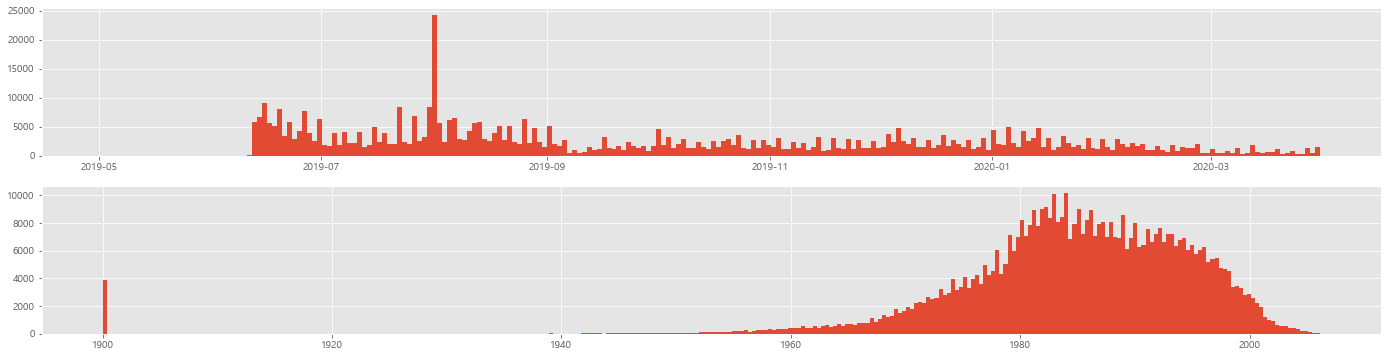

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font",family="Malgun Gothic")  ## 폰트       한글 깨짐
plt.rc("axes",unicode_minus=False)     ## 폰트 minus 부호 깨짐
plt.style.use("ggplot")

plt.figure(figsize=((24,6)))

plt.subplot(2,1,1)
plt.hist(df2.sign_up, bins=244)  ## 가입 분포

plt.subplot(2,1,2)
plt.hist(df2.birth, bins=300)    ## 생일 분포
plt.show()

In [4]:
### 가입일 최다빈도 날짜 top5
###   생일 최다빈도 날짜 top5

print(  df2.sign_up.value_counts().head(5), end="\n\n"  )
print(  df2.birth.value_counts().head(5)                )

2019-08-01    24300
2019-06-14     6764
2019-08-05     6188
2019-07-30     6120
2019-06-13     5849
Name: sign_up, dtype: int64

1900-01-01    3902
1985-02-28     192
1986-02-28     191
1984-02-28     184
1983-02-28     176
Name: birth, dtype: int64


In [6]:
display(df.head(2)) #--- 거래건별 data
display(df2.head(2)) #---- 개인별 data

,id,buy,before,after,back,discnt,total,push,male,foreigner,birth,sign_up,merchant,buy_y,buy_m,buy_d,buy_7,sign_y,sign_m,sign_d,age,b_rate,d_rate,t_rate,cnt_b
4166476,231932,2019-08-01,5000,0,0,5000,5000,0,0,0,1970-08-03,2019-08-01,8,2019,8,1,4,2019,8,1,50,0.0,100.0,100.0,1
2856244,255487,2019-08-01,5000,0,0,5000,5000,1,1,0,1984-01-12,2019-08-01,8,2019,8,1,4,2019,8,1,36,0.0,100.0,100.0,1


,id,male,age,push,foreigner,cnt_b,before,after,back,discnt,total,birth,sign_up,sign_y,sign_m,sign_d,mc1,mc2,mc3,mc4,mc5,mc6,mc7,mc8,mc9,mc10,cnt_p,b_rate,d_rate,t_rate
0,1,0,34,0,0,2,24330,18960,0,5370,5370,1986-03-26,2019-08-25,2019,8,25,0,1,0,0,0,1,0,0,0,0,1,0.0,22.07,22.07
1,2,0,25,0,0,2,25030,19359,0,5671,5671,1995-07-03,2019-08-09,2019,8,9,0,0,0,0,0,0,1,0,1,0,1,0.0,22.66,22.66


In [39]:
### 생일 빠른 순서대로 12명 살펴보기 ---> 최고령자 data
data1 = df2[["birth","cnt_p","cnt_b","before","t_rate"]].groupby("birth").sum()
data1["1time_mean"] = data1["before"] // data1["cnt_b"]  ## 거래 건당 평균 대금
data3 = df[["birth","before"]].groupby("birth").max()
data3 = data3.rename(columns={"before":"1time_max"})
data1 = pd.merge( data1, data3, how="left", on="birth" )  ## 거래 건당 최대 대금
data1["age"] = data1.index
data1["age"] = 2021 - data1["age"].dt.year  # 2020년 기준 한국 나이
data1 = data1.sort_index()
data1.head(12)

,cnt_p,cnt_b,before,t_rate,1time_mean,1time_max,age
birth,,,,,,,
1900-01-01,3902,8913,266626492,114667.56,29914,1138000,121
1919-05-15,1,6,68680,24.05,11446,16560,102
1926-02-20,1,1,5200,96.15,5200,5200,95
1926-07-03,1,1,5640,88.65,5640,5640,95
1927-10-17,1,1,18660,25.40,18660,18660,94
1927-11-02,1,4,33600,23.81,8400,9900,94
1927-11-25,1,1,5900,33.90,5900,5900,94
1928-01-21,1,72,1228223,5.76,17058,52500,93
1929-01-02,1,7,1226500,5.54,175214,935000,92


In [40]:
### 건당 평균가 17만원에 122만원 결제한 유저 탐색
data2 = df.loc[ df.birth=="1929-01-02" ]
data2 = data2[['id', 'birth', 'sign_up', 'buy', 'before', 'after', 'back', 'discnt', 'total', 'push',
       'male', 'foreigner', 'merchant', 'age', 'b_rate', 'd_rate', 't_rate', 'cnt_b']]
data2 = data2.sort_values("buy")
data2

,id,birth,sign_up,buy,before,after,back,discnt,total,push,male,foreigner,merchant,age,b_rate,d_rate,t_rate,cnt_b
995419,220197,1929-01-02,2019-08-01,2019-08-01,5000,0,0,5000,5000,0,0,0,7,91,0.0,100.00,100.00,1
1385046,220197,1929-01-02,2019-08-01,2019-08-05,7000,4000,0,3000,3000,0,0,0,1,91,0.0,42.86,42.86,1
1081119,220197,1929-01-02,2019-08-01,2019-08-19,7000,4000,0,3000,3000,0,0,0,2,91,0.0,42.86,42.86,1
1197149,220197,1929-01-02,2019-08-01,2019-08-19,7000,4000,0,3000,3000,0,0,0,8,91,0.0,42.86,42.86,1
1309609,220197,1929-01-02,2019-08-01,2019-10-21,935000,905000,0,30000,30000,0,0,0,7,91,0.0,3.21,3.21,1
812826,220197,1929-01-02,2019-08-01,2019-10-24,177000,161000,0,16000,16000,0,0,0,5,91,0.0,9.04,9.04,1
1106569,220197,1929-01-02,2019-08-01,2019-10-24,88500,80500,0,8000,8000,0,0,0,9,91,0.0,9.04,9.04,1


In [41]:
### 할인비율 상위 10 항목
df.d_rate.value_counts().head(10)

11.11    1522308
0.00     1454610
20.20      71495
11.10      46402
16.95      42431
25.32      42308
33.90      41644
42.86      38318
10.10      34956
40.82      33229
Name: d_rate, dtype: int64

In [42]:
### 42.86% 할인? ---> 비율보다 총 할인금액을 봐야 한다!
df.loc[  df.d_rate==42.86, "discnt"  ].value_counts()

3000    38242
6000       67
5000        4
4500        3
3600        2
Name: discnt, dtype: int64

In [43]:
### 할인금액 최다빈도 상위 10
df.discnt.value_counts().head(10)

0       1454610
2000    1185724
1000     725046
5000     229936
3000     163312
1501     111061
990       87135
890       43433
790       39157
590       37099
Name: discnt, dtype: int64

In [47]:
### 거래건별 할인금액 큰 순서 내림차순 ----> 상위 10
data1 = df.sort_values(by="discnt", ascending=False)
data1.head(10)

,id,buy,before,after,back,discnt,total,push,male,foreigner,birth,sign_up,merchant,buy_y,buy_m,buy_d,buy_7,sign_y,sign_m,sign_d,age,b_rate,d_rate,t_rate,cnt_b
3137949,276087,2019-09-04,1348280,848280,0,500000,500000,1,1,0,1982-03-23,2019-06-04,9,2019,9,4,3,2019,6,4,38,0.0,37.08,37.08,1
5368219,177212,2019-12-14,1154400,654400,0,500000,500000,1,1,1,1989-04-22,2019-05-29,7,2019,12,14,6,2019,5,29,31,0.0,43.31,43.31,1
5042728,476668,2020-02-07,342200,42200,0,300000,300000,1,1,0,1987-01-30,2019-06-01,5,2020,2,7,5,2019,6,1,34,0.0,87.67,87.67,1
3309071,330038,2020-02-17,965650,665650,19313,300000,319313,0,0,0,1992-09-28,2019-11-21,4,2020,2,17,1,2019,11,21,29,2.0,31.07,33.07,1
766529,518590,2020-01-24,465000,165000,23250,300000,323250,1,1,0,1991-01-05,2019-06-10,3,2020,1,24,5,2019,6,10,30,5.0,64.52,69.52,1
3307000,522460,2020-01-24,451243,151243,22562,300000,322562,1,0,0,1989-02-22,2019-07-01,8,2020,1,24,5,2019,7,1,32,5.0,66.48,71.48,1
3502850,347196,2020-01-23,315950,15950,0,300000,300000,0,1,0,1990-09-17,2019-07-31,6,2020,1,23,4,2019,7,31,31,0.0,94.95,94.95,1
1712573,518390,2020-03-28,1244400,944400,0,300000,300000,1,1,0,1990-01-19,2019-06-10,7,2020,3,28,6,2019,6,10,31,0.0,24.11,24.11,1
383514,228009,2019-11-16,498900,433900,0,65000,65000,0,1,0,2000-08-04,2019-07-23,7,2019,11,16,6,2019,7,23,20,0.0,13.03,13.03,1
3257311,53426,2019-11-15,437650,379650,0,58000,58000,0,0,0,1986-11-14,2019-11-15,10,2019,11,15,5,2019,11,15,34,0.0,13.25,13.25,1


In [45]:
### 건당 할인 금액 상위 10
data2 = df[["discnt","cnt_b"]].groupby(["discnt"]).sum()
data2 = data2.sort_values(by="discnt",ascending=False)
data2.head(10)

,cnt_b
discnt,
500000,2.0
300000,6.0
65000,1.0
58000,1.0
50000,59.0
40000,473.0
37000,1.0
35700,722.0
34650,6.0


In [54]:
x = 500000
display(  data1.loc[ data1.discnt==x ]  )
data1.loc[ data1.discnt==x, "t_rate" ].max()

,id,buy,before,after,back,discnt,total,push,male,foreigner,birth,sign_up,merchant,buy_y,buy_m,buy_d,buy_7,sign_y,sign_m,sign_d,age,b_rate,d_rate,t_rate,cnt_b
3137949,276087,2019-09-04,1348280,848280,0,500000,500000,1,1,0,1982-03-23,2019-06-04,9,2019,9,4,3,2019,6,4,38,0.0,37.08,37.08,1
5368219,177212,2019-12-14,1154400,654400,0,500000,500000,1,1,1,1989-04-22,2019-05-29,7,2019,12,14,6,2019,5,29,31,0.0,43.31,43.31,1


43.31

In [55]:
x = 300000
display(  data1.loc[ data1.discnt==x ]  )
data1.loc[ data1.discnt==x, "t_rate" ].max()

,id,buy,before,after,back,discnt,total,push,male,foreigner,birth,sign_up,merchant,buy_y,buy_m,buy_d,buy_7,sign_y,sign_m,sign_d,age,b_rate,d_rate,t_rate,cnt_b
5042728,476668,2020-02-07,342200,42200,0,300000,300000,1,1,0,1987-01-30,2019-06-01,5,2020,2,7,5,2019,6,1,34,0.0,87.67,87.67,1
3309071,330038,2020-02-17,965650,665650,19313,300000,319313,0,0,0,1992-09-28,2019-11-21,4,2020,2,17,1,2019,11,21,29,2.0,31.07,33.07,1
766529,518590,2020-01-24,465000,165000,23250,300000,323250,1,1,0,1991-01-05,2019-06-10,3,2020,1,24,5,2019,6,10,30,5.0,64.52,69.52,1
3307000,522460,2020-01-24,451243,151243,22562,300000,322562,1,0,0,1989-02-22,2019-07-01,8,2020,1,24,5,2019,7,1,32,5.0,66.48,71.48,1
3502850,347196,2020-01-23,315950,15950,0,300000,300000,0,1,0,1990-09-17,2019-07-31,6,2020,1,23,4,2019,7,31,31,0.0,94.95,94.95,1
1712573,518390,2020-03-28,1244400,944400,0,300000,300000,1,1,0,1990-01-19,2019-06-10,7,2020,3,28,6,2019,6,10,31,0.0,24.11,24.11,1


94.95

In [56]:
x = 65000
display(  data1.loc[ data1.discnt==x ]  )
data1.loc[ data1.discnt==x, "t_rate" ].max()

,id,buy,before,after,back,discnt,total,push,male,foreigner,birth,sign_up,merchant,buy_y,buy_m,buy_d,buy_7,sign_y,sign_m,sign_d,age,b_rate,d_rate,t_rate,cnt_b
383514,228009,2019-11-16,498900,433900,0,65000,65000,0,1,0,2000-08-04,2019-07-23,7,2019,11,16,6,2019,7,23,20,0.0,13.03,13.03,1


13.03

In [57]:
x = 58000
display(  data1.loc[ data1.discnt==x ]  )
data1.loc[ data1.discnt==x, "t_rate" ].max()

,id,buy,before,after,back,discnt,total,push,male,foreigner,birth,sign_up,merchant,buy_y,buy_m,buy_d,buy_7,sign_y,sign_m,sign_d,age,b_rate,d_rate,t_rate,cnt_b
3257311,53426,2019-11-15,437650,379650,0,58000,58000,0,0,0,1986-11-14,2019-11-15,10,2019,11,15,5,2019,11,15,34,0.0,13.25,13.25,1


13.25

### 의심 거래

In [85]:
### 할인 전혀 안 받은 의심거래 ----> 가격 내림차순
data2 = df.loc[ df.total==0, ["id","before",] ]
data2 = data2.sort_values( by="before", ascending=False )
data2.head(10)

,id,before
4023444,185293,1790000
4284525,487328,1599000
5423027,264184,1527860
5564912,413385,1430000
5385779,270142,1275000
719792,57055,1160100
1012451,395439,1138000
2129626,426108,1090000
3208869,347859,959000
1935364,314234,959000


In [88]:
### 외국인 ---> 조선족 환전책??
data3 = df2.loc[ df2.foreigner==1 ]
data3 = data3.sort_values(by="before", ascending=False)
data3.head(10)

,id,male,age,push,foreigner,cnt_b,before,after,back,discnt,total,birth,sign_up,sign_y,sign_m,sign_d,mc1,mc2,mc3,mc4,mc5,mc6,mc7,mc8,mc9,mc10,cnt_p,b_rate,d_rate,t_rate
357524,357525,0,31,1,1,1020,22328954,21730846,181046,598108,779154,1990-09-06,2019-07-25,2019,7,25,72,102,105,93,125,117,108,127,115,56,1,0.81,2.68,3.49
224459,224460,0,28,1,1,556,18509049,17810369,32730,698680,731410,1993-12-22,2019-06-25,2019,6,25,30,57,67,71,69,53,57,65,56,31,1,0.18,3.77,3.95
498861,498862,0,28,1,1,1013,17430846,17242586,52943,188260,241203,1993-09-06,2019-11-28,2019,11,28,49,119,97,122,111,115,112,109,137,42,1,0.30,1.08,1.38
96305,96306,0,29,1,1,1229,15070935,14838387,222934,232548,455482,1992-12-29,2019-11-17,2019,11,17,70,141,135,133,124,169,149,120,130,58,1,1.48,1.54,3.02
262048,262049,0,25,1,1,1127,14081076,13575121,141597,505955,647552,1996-08-19,2019-07-02,2019,7,2,74,123,138,113,149,128,114,102,127,59,1,1.01,3.59,4.60
407238,407239,0,31,1,1,487,12480238,12067983,248180,412255,660435,1990-07-21,2019-07-01,2019,7,1,29,56,60,41,62,44,57,55,56,27,1,1.99,3.30,5.29
417817,417818,0,62,1,1,115,9806020,9724180,312593,81840,394433,1959-06-21,2019-08-06,2019,8,6,7,16,10,13,13,14,5,14,17,6,1,3.19,0.83,4.02
428494,428495,0,31,1,1,227,9082160,8924470,218724,157690,376414,1990-02-19,2019-11-09,2019,11,9,12,18,25,31,30,22,17,28,24,20,1,2.41,1.74,4.14
34606,34607,1,30,0,1,180,9063170,9019440,165136,43730,208866,1991-02-09,2019-11-23,2019,11,23,16,16,18,17,14,18,20,22,24,15,1,1.82,0.48,2.30
496030,496031,1,32,1,1,112,7405732,7139933,55781,265799,321580,1989-04-19,2019-08-02,2019,8,2,8,14,16,10,13,6,11,10,15,9,1,0.75,3.59,4.34


In [96]:
### N회 구매한 인원수
print(  A := df2.loc[ df2.cnt_b==1 ].shape[0], round(100*A/df2.shape[0],2)  )
print(  A := df2.loc[ df2.cnt_b==2 ].shape[0], round(100*A/df2.shape[0],2)  )
print(  A := df2.loc[ df2.cnt_b==3 ].shape[0], round(100*A/df2.shape[0],2)  )

163227 29.95
73138 13.42
46042 8.45


In [97]:
### N회 이상 구매한 인원수
print(  A := df2.loc[ df2.cnt_b>=1 ].shape[0], round(100*A/df2.shape[0],2)  )  # (전체 인원수)
print(  A := df2.loc[ df2.cnt_b>=2 ].shape[0], round(100*A/df2.shape[0],2)  )
print(  A := df2.loc[ df2.cnt_b>=3 ].shape[0], round(100*A/df2.shape[0],2)  )

544921 100.0
381694 70.05
308556 56.62
